In [1]:
%matplotlib inline

In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pylab as plt
import imp
import csv
import pandas as pd
import random as rnd

In [3]:
# Read atmospheric forcing

NumTensemble = 600
Tlen = 651

#fname = "../MAGICC/RCP2500/Temp_RCP45_HistConstraint.dat" # File to read
#df = pd.read_csv(fname,sep='\s+',index_col=0,header=None)
#df.columns.name = "ensemble member"
#df.index.name = "Time"
#T = np.array(df.values)

fname = "../MAGICC/RCP2500/Temp_RCP45_HistConstraint.dat" # File to read
df = pd.read_csv(fname,sep='\s+',index_col=0,header=None)
df.columns.name = "ensemble member"
df.index.name = "Time"
SAT = np.array(df.values)

print(len(SAT[:,1]))
# SAT[time,ensemblemember]

651


In [4]:
# Normalize and crop temperature series
Temp = []
Tavebeg = 0
Taveend = 80
tbeg = 51
tend = 251
for i in range(len(SAT[1,:])):
    SATave = np.mean(SAT[Tavebeg:Taveend,i])
    SAT[:,i] = SAT[:,i]-SATave
SAT = SAT[tbeg:tend,:]

In [5]:
# Read ocean scaling

NumOmodel = 19

fname = "../ScalingCoefficients/OceanScaling/OS_R1.dat" # File to read
with open(fname) as f:
    OS_NoDelay_R1 = np.array([float(row.split("\t")[0]) for row in f])
with open(fname) as f:
    OS_WiDelay_R1 = np.array([float(row.split("\t")[3]) for row in f])
with open(fname) as f:
    OS_Delay_R1 = np.array([float(row.split("\t")[2]) for row in f])
#print(OS_NoDelay_R1)
#print(OS_WiDelay_R1)
#print(OS_Delay_R1)

fname = "../ScalingCoefficients/OceanScaling/OS_R2.dat" # File to read
with open(fname) as f:
    OS_NoDelay_R2 = np.array([float(row.split("\t")[0]) for row in f])
with open(fname) as f:
    OS_WiDelay_R2 = np.array([float(row.split("\t")[3]) for row in f])
with open(fname) as f:
    OS_Delay_R2 = np.array([float(row.split("\t")[2]) for row in f])
#print(OS_NoDelay_R2)
#print(OS_WiDelay_R2)
#print(OS_Delay_R2)

fname = "../ScalingCoefficients/OceanScaling/OS_R3.dat" # File to read
with open(fname) as f:
    OS_NoDelay_R3 = np.array([float(row.split("\t")[0]) for row in f])
with open(fname) as f:
    OS_WiDelay_R3 = np.array([float(row.split("\t")[3]) for row in f])
with open(fname) as f:
    OS_Delay_R3 = np.array([float(row.split("\t")[2]) for row in f])
#print(OS_NoDelay_R3)
#print(OS_WiDelay_R3)
#print(OS_Delay_R3)

fname = "../ScalingCoefficients/OceanScaling/OS_R4.dat" # File to read
with open(fname) as f:
    OS_NoDelay_R4 = np.array([float(row.split("\t")[0]) for row in f])
with open(fname) as f:
    OS_WiDelay_R4 = np.array([float(row.split("\t")[3]) for row in f])
with open(fname) as f:
    OS_Delay_R4 = np.array([float(row.split("\t")[2]) for row in f])
#print(OS_NoDelay_R4)
#print(OS_WiDelay_R4)
#print(OS_Delay_R4)

In [6]:
# Read melting sensitivity
fname = "../ScalingCoefficients/MeltSensitivity/MeltSensitivity.dat" # File to read
with open(fname) as f:
    MeltSensitivity = np.array([float(row) for row in f])

#print(MS)
#print("Lower limit of melt sensitivity: ",MS[0])
#print("Upper limit of melt sensitivity: ",MS[1])

In [7]:
EnsembleSize = 20000
scaled_forcing = False

countR1 = 0
countR2 = 0
countR3 = 0
countR4 = 0

M_R1 = [0] * (tend-tbeg)
M_R2 = [0] * (tend-tbeg)
M_R3 = [0] * (tend-tbeg)
M_R4 = [0] * (tend-tbeg)
M_R5 = [0] * (tend-tbeg)

for i in range(EnsembleSize):

    # Select forcing randomly

    # select global warming path
    iTens = rnd.randint(0,NumTensemble-1)
    Temp = np.array(SAT[:,iTens])

    # select ocean model
    iOmod = rnd.randint(0,NumOmodel-1)
    OS_R1 = OS_WiDelay_R1[iOmod]
    OS_R2 = OS_WiDelay_R2[iOmod]
    OS_R3 = OS_WiDelay_R3[iOmod]
    OS_R4 = OS_WiDelay_R4[iOmod]
    OS_R5 = OS_WiDelay_R4[iOmod]

    tau_R1 = int(OS_Delay_R1[iOmod])
    tau_R2 = int(OS_Delay_R2[iOmod])
    tau_R3 = int(OS_Delay_R3[iOmod])
    tau_R4 = int(OS_Delay_R4[iOmod])
    tau_R5 = int(OS_Delay_R4[iOmod])

    if tau_R1>0:
        countR1 = countR1+1
    if tau_R2>0:
        countR2 = countR2+1
    if tau_R3>0:
        countR3 = countR3+1
    if tau_R4>0:
        countR4 = countR4+1
    
    Temp_R1 = np.append(np.zeros(tau_R1),Temp[:tend-tbeg-tau_R1])
    Temp_R2 = np.append(np.zeros(tau_R2),Temp[:tend-tbeg-tau_R2])
    Temp_R3 = np.append(np.zeros(tau_R3),Temp[:tend-tbeg-tau_R3])
    Temp_R4 = np.append(np.zeros(tau_R4),Temp[:tend-tbeg-tau_R4])
    Temp_R5 = np.append(np.zeros(tau_R5),Temp[:tend-tbeg-tau_R5])
    
    # select melting sensitivity
    MS_R1 = rnd.uniform(MeltSensitivity[0],MeltSensitivity[1])
    MS_R2 = rnd.uniform(MeltSensitivity[0],MeltSensitivity[1])
    MS_R3 = rnd.uniform(MeltSensitivity[0],MeltSensitivity[1])
    MS_R4 = rnd.uniform(MeltSensitivity[0],MeltSensitivity[1])
    MS_R5 = rnd.uniform(MeltSensitivity[0],MeltSensitivity[1])

    # Compose forcing time series
    M_R1_single = MS_R1*OS_R1*Temp_R1
    M_R2_single = MS_R2*OS_R2*Temp_R2
    M_R3_single = MS_R3*OS_R3*Temp_R3
    M_R4_single = MS_R4*OS_R4*Temp_R4
    M_R5_single = MS_R5*OS_R5*Temp_R5
    
    M_R1=np.vstack([M_R1, M_R1_single])
    M_R2=np.vstack([M_R2, M_R2_single])
    M_R3=np.vstack([M_R3, M_R3_single])
    M_R4=np.vstack([M_R4, M_R4_single])
    M_R5=np.vstack([M_R5, M_R5_single])
    

M_R1[M_R1 < 0.0] = 0.0
M_R2[M_R2 < 0.0] = 0.0
M_R3[M_R3 < 0.0] = 0.0
M_R4[M_R4 < 0.0] = 0.0
M_R5[M_R5 < 0.0] = 0.0
    


In [8]:
Time = range(1900,2100)
print(len(Time))
print(len(M_R1[:,0]))
print(len(M_R1[0,:]))


200
20001
200


In [9]:
ncfile = nc.Dataset('EnsembleBasalMelt/BasalMelt_wTd_nos_RCP45.nc','w', format='NETCDF4')
ncfile.createDimension('Time', None)
ncfile.createDimension('Emember', None)

BM_wdT_nos_R1 = ncfile.createVariable('EAIS', 'f4', ('Emember', 'Time'))
BM_wdT_nos_R2 = ncfile.createVariable('Ross', 'f4', ('Emember', 'Time'))
BM_wdT_nos_R3 = ncfile.createVariable('Amundsen', 'f4', ('Emember', 'Time'))
BM_wdT_nos_R4 = ncfile.createVariable('Weddell', 'f4', ('Emember', 'Time'))
BM_wdT_nos_R5 = ncfile.createVariable('Peninsula', 'f4', ('Emember', 'Time'))
t = ncfile.createVariable('Time', 'i4', 'Time')

BM_wdT_nos_R1[:,:] = M_R1
BM_wdT_nos_R2[:,:] = M_R2
BM_wdT_nos_R3[:,:] = M_R3
BM_wdT_nos_R4[:,:] = M_R4
BM_wdT_nos_R5[:,:] = M_R5
t[:] = Time

BM_wdT_nos_R1.units = 'meter per years'
BM_wdT_nos_R2.units = 'meter per years'
BM_wdT_nos_R3.units = 'meter per years'
BM_wdT_nos_R4.units = 'meter per years'
BM_wdT_nos_R5.units = 'meter per years'

t.units = 'years'

ncfile.close()

In [10]:
BM_wdT_nos_RCP45_R1_50pc = np.percentile(M_R1, 50, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R1_83pc = np.percentile(M_R1, 83.33, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R1_17pc = np.percentile(M_R1, 16.66, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R1_05pc = np.percentile(M_R1, 5, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R1_95pc = np.percentile(M_R1, 95, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R1_99pc = np.percentile(M_R1, 99, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R1_01pc = np.percentile(M_R1, 1, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)

np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R1_50pc.dat", BM_wdT_nos_RCP45_R1_50pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R1_83pc.dat", BM_wdT_nos_RCP45_R1_83pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R1_17pc.dat", BM_wdT_nos_RCP45_R1_17pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R1_05pc.dat", BM_wdT_nos_RCP45_R1_05pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R1_95pc.dat", BM_wdT_nos_RCP45_R1_95pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R1_01pc.dat", BM_wdT_nos_RCP45_R1_01pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R1_99pc.dat", BM_wdT_nos_RCP45_R1_99pc, delimiter=",")


In [11]:
BM_wdT_nos_RCP45_R2_50pc = np.percentile(M_R2, 50, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R2_83pc = np.percentile(M_R2, 83.33, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R2_17pc = np.percentile(M_R2, 16.66, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R2_05pc = np.percentile(M_R2, 5, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R2_95pc = np.percentile(M_R2, 95, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R2_99pc = np.percentile(M_R2, 99, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R2_01pc = np.percentile(M_R2, 1, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)

np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R2_50pc.dat", BM_wdT_nos_RCP45_R2_50pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R2_83pc.dat", BM_wdT_nos_RCP45_R2_83pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R2_17pc.dat", BM_wdT_nos_RCP45_R2_17pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R2_05pc.dat", BM_wdT_nos_RCP45_R2_05pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R2_95pc.dat", BM_wdT_nos_RCP45_R2_95pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R2_01pc.dat", BM_wdT_nos_RCP45_R2_01pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R2_99pc.dat", BM_wdT_nos_RCP45_R2_99pc, delimiter=",")


In [12]:
BM_wdT_nos_RCP45_R3_50pc = np.percentile(M_R3, 50, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R3_83pc = np.percentile(M_R3, 83.33, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R3_17pc = np.percentile(M_R3, 16.66, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R3_05pc = np.percentile(M_R3, 5, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R3_95pc = np.percentile(M_R3, 95, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R3_99pc = np.percentile(M_R3, 99, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R3_01pc = np.percentile(M_R3, 1, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)

np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R3_50pc.dat", BM_wdT_nos_RCP45_R3_50pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R3_83pc.dat", BM_wdT_nos_RCP45_R3_83pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R3_17pc.dat", BM_wdT_nos_RCP45_R3_17pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R3_05pc.dat", BM_wdT_nos_RCP45_R3_05pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R3_95pc.dat", BM_wdT_nos_RCP45_R3_95pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R3_01pc.dat", BM_wdT_nos_RCP45_R3_01pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R3_99pc.dat", BM_wdT_nos_RCP45_R3_99pc, delimiter=",")


In [13]:
BM_wdT_nos_RCP45_R4_50pc = np.percentile(M_R4, 50, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R4_83pc = np.percentile(M_R4, 83.33, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R4_17pc = np.percentile(M_R4, 16.66, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R4_05pc = np.percentile(M_R4, 5, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R4_95pc = np.percentile(M_R4, 95, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R4_99pc = np.percentile(M_R4, 99, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R4_01pc = np.percentile(M_R4, 1, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)

np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R4_50pc.dat", BM_wdT_nos_RCP45_R4_50pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R4_83pc.dat", BM_wdT_nos_RCP45_R4_83pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R4_17pc.dat", BM_wdT_nos_RCP45_R4_17pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R4_05pc.dat", BM_wdT_nos_RCP45_R4_05pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R4_95pc.dat", BM_wdT_nos_RCP45_R4_95pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R4_01pc.dat", BM_wdT_nos_RCP45_R4_01pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R4_99pc.dat", BM_wdT_nos_RCP45_R4_99pc, delimiter=",")


In [14]:
BM_wdT_nos_RCP45_R5_50pc = np.percentile(M_R5, 50, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R5_83pc = np.percentile(M_R5, 83.33, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R5_17pc = np.percentile(M_R5, 16.66, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R5_05pc = np.percentile(M_R5, 5, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R5_95pc = np.percentile(M_R5, 95, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R5_99pc = np.percentile(M_R5, 99, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
BM_wdT_nos_RCP45_R5_01pc = np.percentile(M_R5, 1, axis=0, out=None, overwrite_input=False, interpolation='linear', keepdims=False)

np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R5_50pc.dat", BM_wdT_nos_RCP45_R5_50pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R5_83pc.dat", BM_wdT_nos_RCP45_R5_83pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R5_17pc.dat", BM_wdT_nos_RCP45_R5_17pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R5_05pc.dat", BM_wdT_nos_RCP45_R5_05pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R5_95pc.dat", BM_wdT_nos_RCP45_R5_95pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R5_01pc.dat", BM_wdT_nos_RCP45_R5_01pc, delimiter=",")
np.savetxt("PercentilesBasalMelt/BM_wdT_nos_RCP45_R5_99pc.dat", BM_wdT_nos_RCP45_R5_99pc, delimiter=",")


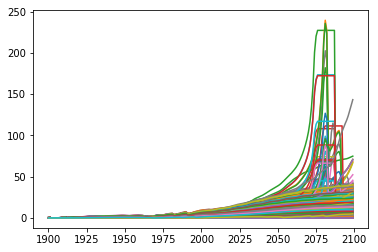

In [15]:
fp3=plt.figure()
for i in range(EnsembleSize):
    plt.plot(Time,M_R1[i,:])

plt.show()
fp3.savefig("Figures/BM_wdT_nos_RCP45_R1_alllines.pdf", bbox_inches='tight')


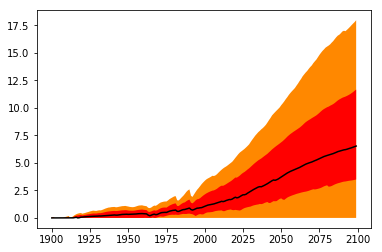

In [16]:
fp2 = plt.figure()
plt.fill_between(Time, BM_wdT_nos_RCP45_R1_05pc, BM_wdT_nos_RCP45_R1_95pc,facecolor='#ff8800')
plt.fill_between(Time, BM_wdT_nos_RCP45_R1_17pc, BM_wdT_nos_RCP45_R1_83pc,facecolor='#ff0000')
plt.plot(Time, BM_wdT_nos_RCP45_R1_50pc, 'k-')
plt.show()
fp2.savefig("Figures/BM_wdT_nos_RCP45_R1_percentiles_shades.pdf", bbox_inches='tight')


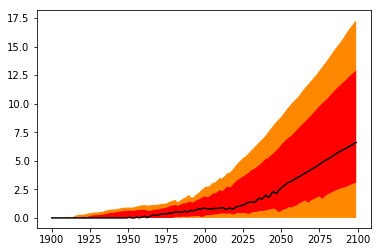

In [17]:
fp2 = plt.figure()
plt.fill_between(Time, BM_wdT_nos_RCP45_R2_05pc, BM_wdT_nos_RCP45_R2_95pc,facecolor='#ff8800')
plt.fill_between(Time, BM_wdT_nos_RCP45_R2_17pc, BM_wdT_nos_RCP45_R2_83pc,facecolor='#ff0000')
plt.plot(Time, BM_wdT_nos_RCP45_R2_50pc, 'k-')
plt.show()
fp2.savefig("Figures/BM_wdT_nos_RCP45_R2_percentiles_shades.pdf", bbox_inches='tight')


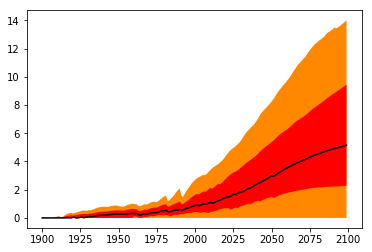

In [18]:
fp2 = plt.figure()
plt.fill_between(Time, BM_wdT_nos_RCP45_R3_05pc, BM_wdT_nos_RCP45_R3_95pc,facecolor='#ff8800')
plt.fill_between(Time, BM_wdT_nos_RCP45_R3_17pc, BM_wdT_nos_RCP45_R3_83pc,facecolor='#ff0000')
plt.plot(Time, BM_wdT_nos_RCP45_R3_50pc, 'k-')
plt.show()
fp2.savefig("Figures/BM_wdT_nos_RCP45_R3_percentiles_shades.pdf", bbox_inches='tight')


In [19]:
fp2 = plt.figure()
plt.fill_between(Time, BM_wdT_RCP45_nos_R4_05pc, BM_wdT_nos_RCP45_R4_95pc,facecolor='#ff8800')
plt.fill_between(Time, BM_wdT_RCP45_nos_R4_17pc, BM_wdT_nos_RCP45_R4_83pc,facecolor='#ff0000')
plt.plot(Time, BM_wdT_nos_RCP45_R4_50pc, 'k-')
plt.show()
fp2.savefig("Figures/BM_wdT_nos_RCP45_R4_percentiles_shades.pdf", bbox_inches='tight')


NameError: name 'BM_wdT_RCP45_nos_R4_05pc' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
fp2 = plt.figure()
plt.fill_between(Time, BM_wdT_nos_RCP45_R5_05pc, BM_wdT_nos_RCP45_R5_95pc,facecolor='#ff8800')
plt.fill_between(Time, BM_wdT_nos_RCP45_R5_17pc, BM_wdT_nos_RCP45_R5_83pc,facecolor='#ff0000')
plt.plot(Time, BM_wdT_nos_RCP45_R5_50pc, 'k-')
plt.show()
fp2.savefig("Figures/BM_wdT_nos_RCP45_R5_percentiles_shades.pdf", bbox_inches='tight')
